In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
# 'Pandas' kütüphanesini 'pd' kısaltmasını kullanacak şekilde import ediyoruz (literatürde kullanılan kısaltma)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C://Users//sevag//Desktop//dsproject//MTA_Subway_Hourly_Ridership__Beginning_July_2020_1year.csv", low_memory=False)
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,11/01/2023 12:00:00 AM,subway,457,52 St (7),Queens,omny,OMNY - Full Fare,5,0,40.744150,-73.91255,POINT (-73.91255 40.74415)
1,11/01/2023 12:00:00 AM,subway,348,Rockaway Av (3),Brooklyn,metrocard,Metrocard - Students,4,0,40.662548,-73.90894,POINT (-73.90894 40.662548)
2,11/01/2023 12:00:00 AM,subway,396,96 St (6),Manhattan,omny,OMNY - Full Fare,18,1,40.785670,-73.95107,POINT (-73.95107 40.78567)
3,11/01/2023 12:00:00 AM,subway,398,77 St (6),Manhattan,omny,OMNY - Full Fare,43,0,40.773620,-73.95988,POINT (-73.95988 40.77362)
4,11/01/2023 12:00:00 AM,subway,394,110 St (6),Manhattan,metrocard,Metrocard - Fair Fare,2,0,40.795020,-73.94425,POINT (-73.94425 40.79502)
...,...,...,...,...,...,...,...,...,...,...,...,...
26128647,10/27/2024 11:00:00 PM,subway,405,23 St (6),Manhattan,metrocard,Metrocard - Unlimited 30-Day,16,0,40.739864,-73.98660,POINT (-73.9866 40.739864)
26128648,10/27/2024 11:00:00 PM,subway,446,Morris Park (5),Bronx,metrocard,Metrocard - Unlimited 7-Day,1,0,40.854362,-73.86050,POINT (-73.8605 40.854362)
26128649,10/27/2024 11:00:00 PM,subway,65,79 St (D),Brooklyn,metrocard,Metrocard - Full Fare,1,0,40.613503,-74.00061,POINT (-74.00061 40.613503)
26128650,10/27/2024 11:00:00 PM,subway,234,East Broadway (F),Manhattan,omny,OMNY - Full Fare,67,1,40.713715,-73.99017,POINT (-73.99017 40.713715)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26128652 entries, 0 to 26128651
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transit_timestamp    object 
 1   transit_mode         object 
 2   station_complex_id   object 
 3   station_complex      object 
 4   borough              object 
 5   payment_method       object 
 6   fare_class_category  object 
 7   ridership            int64  
 8   transfers            int64  
 9   latitude             float64
 10  longitude            float64
 11  Georeference         object 
dtypes: float64(2), int64(2), object(8)
memory usage: 2.3+ GB


In [5]:
df.isnull().sum()

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
Georeference           0
dtype: int64

In [6]:
df.transit_mode.unique()

array(['subway', 'tram', 'staten_island_railway'], dtype=object)

In [7]:
df.borough.unique()

array(['Queens', 'Brooklyn', 'Manhattan', 'Bronx', 'Staten Island'],
      dtype=object)

In [8]:
df.duplicated().sum()

0

In [ ]:
# Remove unnecessary columns
columns_to_drop = ['Georeference', 'station_complex_id', 'payment_method', 'fare_class_category', 'transfers', 'latitude', 'longitude' ]
df = df.drop(columns=columns_to_drop)

df.head()

,transit_timestamp,transit_mode,station_complex,borough,ridership
0,11/01/2023 12:00:00 AM,subway,52 St (7),Queens,5
1,11/01/2023 12:00:00 AM,subway,Rockaway Av (3),Brooklyn,4
2,11/01/2023 12:00:00 AM,subway,96 St (6),Manhattan,18
3,11/01/2023 12:00:00 AM,subway,77 St (6),Manhattan,43
4,11/01/2023 12:00:00 AM,subway,110 St (6),Manhattan,2


In [ ]:
# Filter Transit mode as 'subway' 
df_modified = df[df['transit_mode'] == 'subway']
df_modified

,transit_timestamp,transit_mode,station_complex,borough,ridership
0,11/01/2023 12:00:00 AM,subway,52 St (7),Queens,5
1,11/01/2023 12:00:00 AM,subway,Rockaway Av (3),Brooklyn,4
2,11/01/2023 12:00:00 AM,subway,96 St (6),Manhattan,18
3,11/01/2023 12:00:00 AM,subway,77 St (6),Manhattan,43
4,11/01/2023 12:00:00 AM,subway,110 St (6),Manhattan,2
...,...,...,...,...,...
26128647,10/27/2024 11:00:00 PM,subway,23 St (6),Manhattan,16
26128648,10/27/2024 11:00:00 PM,subway,Morris Park (5),Bronx,1
26128649,10/27/2024 11:00:00 PM,subway,79 St (D),Brooklyn,1
26128650,10/27/2024 11:00:00 PM,subway,East Broadway (F),Manhattan,67


In [11]:
df_modified.transit_mode.unique()

array(['subway'], dtype=object)

In [12]:
df_modified.borough.unique()

array(['Queens', 'Brooklyn', 'Manhattan', 'Bronx'], dtype=object)

In [ ]:
# Clearing unnecessary parts of data within parentheses
df_modified.loc[:, 'station_complex'] = df_modified['station_complex'].str.replace(r'\(.*\)', '', regex=True)
df_modified

,transit_timestamp,transit_mode,station_complex,borough,ridership
0,11/01/2023 12:00:00 AM,subway,52 St,Queens,5
1,11/01/2023 12:00:00 AM,subway,Rockaway Av,Brooklyn,4
2,11/01/2023 12:00:00 AM,subway,96 St,Manhattan,18
3,11/01/2023 12:00:00 AM,subway,77 St,Manhattan,43
4,11/01/2023 12:00:00 AM,subway,110 St,Manhattan,2
...,...,...,...,...,...
26128647,10/27/2024 11:00:00 PM,subway,23 St,Manhattan,16
26128648,10/27/2024 11:00:00 PM,subway,Morris Park,Bronx,1
26128649,10/27/2024 11:00:00 PM,subway,79 St,Brooklyn,1
26128650,10/27/2024 11:00:00 PM,subway,East Broadway,Manhattan,67


In [ ]:
# Convert transit_timestamp to datetime format
df_modified.loc[:,'transit_timestamp'] = pd.to_datetime(df_modified['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')
df_modified.head()

,transit_timestamp,transit_mode,station_complex,borough,ridership
0,2023-11-01 00:00:00,subway,52 St,Queens,5
1,2023-11-01 00:00:00,subway,Rockaway Av,Brooklyn,4
2,2023-11-01 00:00:00,subway,96 St,Manhattan,18
3,2023-11-01 00:00:00,subway,77 St,Manhattan,43
4,2023-11-01 00:00:00,subway,110 St,Manhattan,2


In [ ]:
# Calculate total ridership for each borough, reset the index, and sort by total ridership in descending order
borough_ridership = df_modified.groupby('borough')['ridership'].sum().reset_index().sort_values('ridership', ascending=False)
borough_ridership

,borough,ridership
2,Manhattan,653560402
1,Brooklyn,259970002
3,Queens,174294578
0,Bronx,78787557


In [ ]:
# 1. Calculating the total number of passengers
total_ridership = df_modified['ridership'].sum()

# 2. Calculating the ratio of the total number of passengers to the total number of passengers in each district
borough_ridership_sum = df_modified.groupby('borough')['ridership'].sum().reset_index()
borough_ridership_sum['ridership_ratio'] = borough_ridership_sum['ridership'] / total_ridership

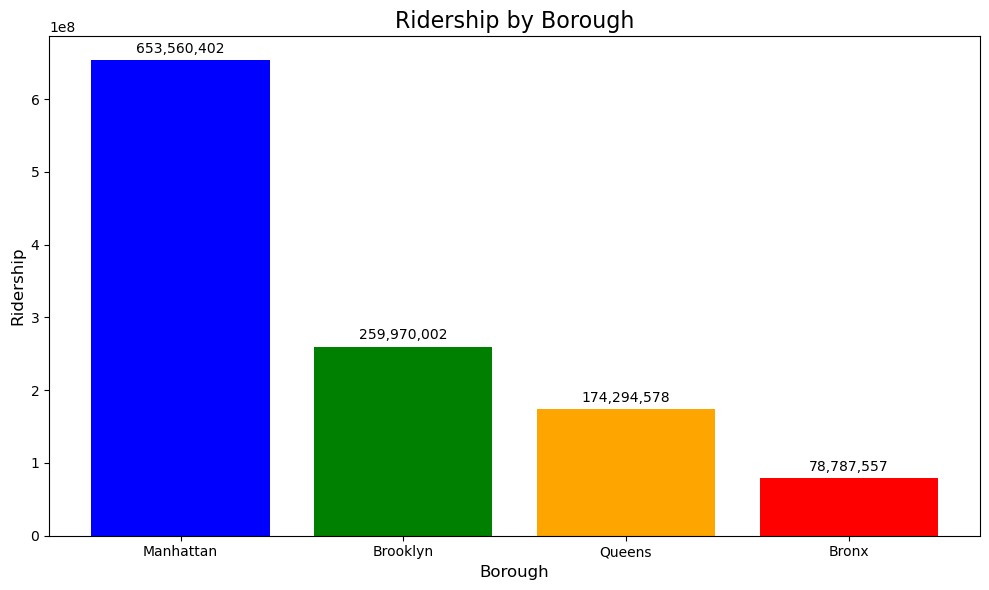

In [ ]:
# Bar plot for sum of ridership per borough 
plt.figure(figsize=(10, 6))  
plt.bar(borough_ridership['borough'], borough_ridership['ridership'], color=['blue', 'green', 'orange', 'red'])

plt.title('Ridership by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Ridership', fontsize=12)

for i, value in enumerate(borough_ridership['ridership']):
    plt.text(i, value + 10000000, f'{value:,}', ha='center', fontsize=10)

plt.tight_layout()

plt.show()

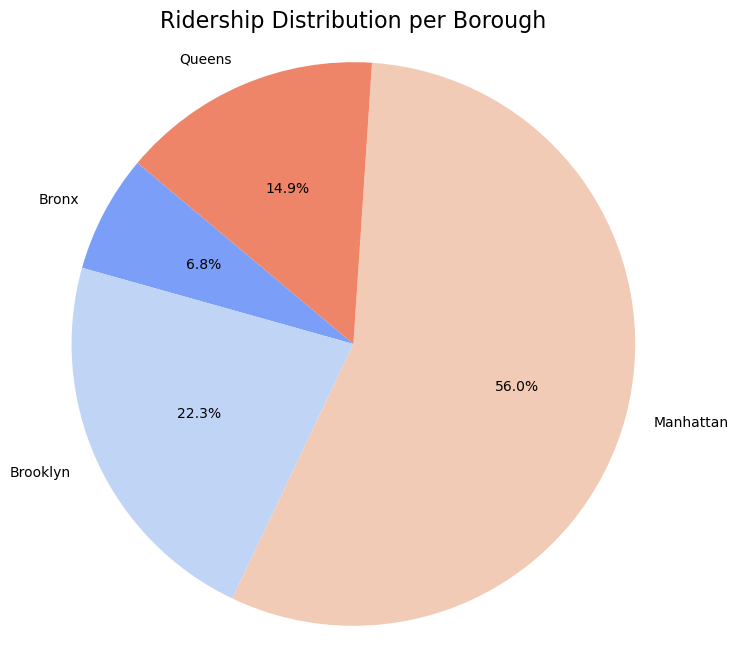

In [ ]:
# Pie chart for Ridership Distribution per Borough
plt.figure(figsize=(8, 8))

labels = borough_ridership_sum['borough']
sizes = borough_ridership_sum['ridership_ratio'] * 100 

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(sizes)))
plt.title('Ridership Distribution per Borough', fontsize=16)
plt.axis('equal')  
plt.show()

In [ ]:
# Busiest stations
station_ridership = df_modified.groupby('station_complex')['ridership'].sum().reset_index().sort_values('ridership', ascending=False)
station_ridership

,station_complex,ridership
319,Times Sq-42 St,44353010
60,34 St-Penn Station,33885768
216,Grand Central-42 St,32762485
102,86 St,25714742
58,34 St-Herald Sq,24189658
...,...,...
131,Beach 36 St,162986
132,Beach 44 St,149393
136,Beach 98 St,102253
129,Beach 105 St,71919


C:\Users\Sevag\AppData\Local\Temp\ipykernel_6536\756736586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_stations['station_complex'], y=top_10_stations['ridership'], palette="YlOrBr_r")


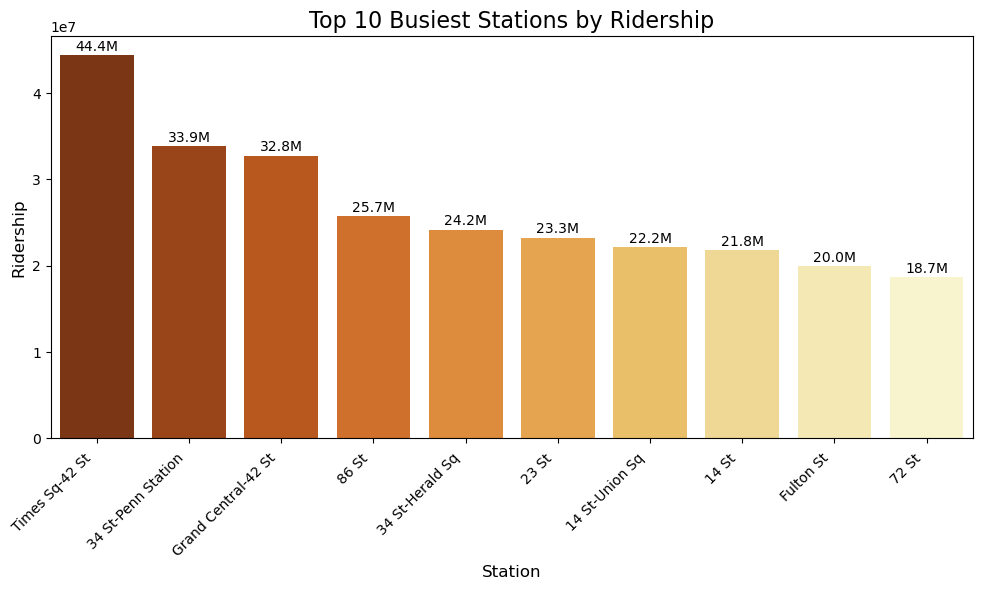

In [ ]:
#Bar Plot of Top 10 Busiest Stations by Ridership with Annotations in Millions
top_10_stations = station_ridership.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stations['station_complex'], y=top_10_stations['ridership'], palette="YlOrBr_r")

plt.title('Top 10 Busiest Stations by Ridership', fontsize=16)
plt.xlabel('Station', fontsize=12)
plt.ylabel('Ridership', fontsize=12)

# Change Ridership value to millions and add 'M'
for i, value in enumerate(top_10_stations['ridership']):
    ridership_display = f'{value / 1_000_000:.1f}M' if value >= 1_000_000 else f'{value:,}'
    plt.text(i, value + 500000, ridership_display, ha='center', fontsize=10)


plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [ ]:
# List of month names
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Get month information from 'transit timestamp' column and create month names column
df_modified.loc[:,'month_name'] = pd.to_datetime(df_modified['transit_timestamp']).dt.month.apply(lambda x: month_names[x - 1])

C:\Users\Sevag\AppData\Local\Temp\ipykernel_6536\3979324402.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified.loc[:,'month_name'] = pd.to_datetime(df_modified['transit_timestamp']).dt.month.apply(lambda x: month_names[x - 1])


In [20]:
df_modified.head()

,transit_timestamp,transit_mode,station_complex,borough,ridership,month_name
0,2023-11-01 00:00:00,subway,52 St,Queens,5,November
1,2023-11-01 00:00:00,subway,Rockaway Av,Brooklyn,4,November
2,2023-11-01 00:00:00,subway,96 St,Manhattan,18,November
3,2023-11-01 00:00:00,subway,77 St,Manhattan,43,November
4,2023-11-01 00:00:00,subway,110 St,Manhattan,2,November


In [ ]:
# Total ridership for per month names
monthly_ridership = df_modified.groupby('month_name')['ridership'].sum().reset_index()
monthly_ridership['month_name'] = pd.Categorical(monthly_ridership['month_name'], categories=month_names, ordered=True)

# Sort by month names
monthly_ridership = monthly_ridership.sort_values('month_name', ascending=True)
monthly_ridership


,month_name,ridership
4,January,92494907
3,February,91301609
7,March,101077921
0,April,100320635
8,May,106949452
6,June,96949880
5,July,94713910
1,August,93291277
11,September,94732931
10,October,97371793


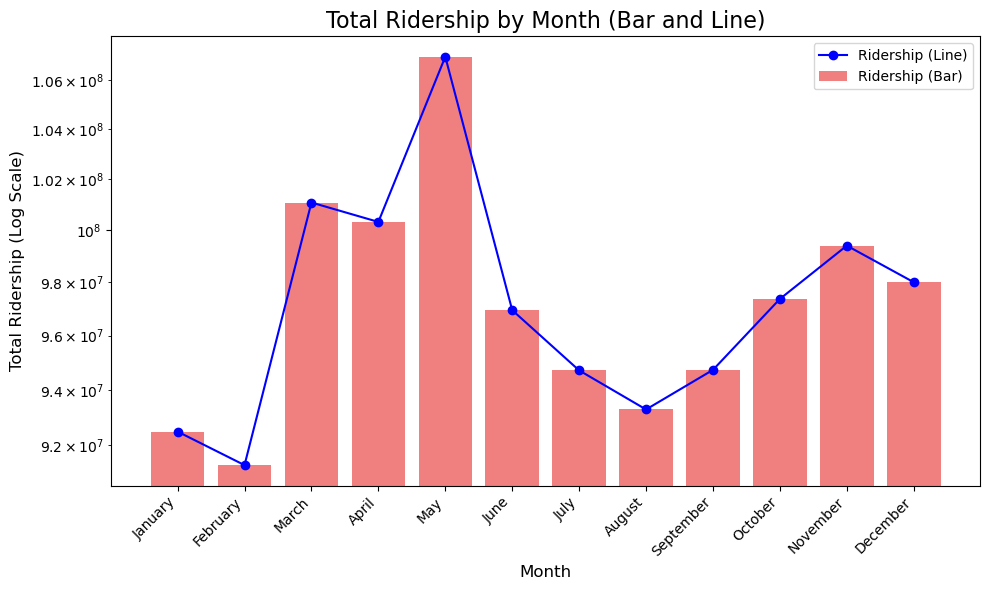

In [ ]:
# Total Ridership by Month: Bar and Line Plot with Logarithmic Scale
plt.figure(figsize=(10, 6))
plt.bar(monthly_ridership['month_name'], monthly_ridership['ridership'], color='lightcoral', label='Ridership (Bar)')

# Adjusting the Y-axis to logarithmic
plt.yscale('log')

plt.plot(monthly_ridership['month_name'], monthly_ridership['ridership'], marker='o', color='blue', label='Ridership (Line)')

plt.title('Total Ridership by Month (Bar and Line)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Ridership (Log Scale)', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Extract the time from the date and time information in the 'transit timestamp' column and store it in a new column
df_modified.loc[:, 'hour'] = pd.to_datetime(df_modified['transit_timestamp']).dt.strftime('%H:%M')
df_modified[['transit_timestamp', 'hour']].head()


C:\Users\Sevag\AppData\Local\Temp\ipykernel_6536\4173944465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified.loc[:, 'hour'] = pd.to_datetime(df_modified['transit_timestamp']).dt.strftime('%H:%M')


,transit_timestamp,hour
0,2023-11-01 00:00:00,00:00
1,2023-11-01 00:00:00,00:00
2,2023-11-01 00:00:00,00:00
3,2023-11-01 00:00:00,00:00
4,2023-11-01 00:00:00,00:00


In [ ]:
# Total Ridership by Hour"
hourly_ridership = df_modified.groupby('hour')['ridership'].sum().reset_index()

hourly_ridership

,hour,ridership
0,00:00,10049437
1,01:00,4357639
2,02:00,2621224
3,03:00,2511991
4,04:00,5662728
5,05:00,18154904
6,06:00,39618896
7,07:00,75783232
8,08:00,94192137
9,09:00,66028223


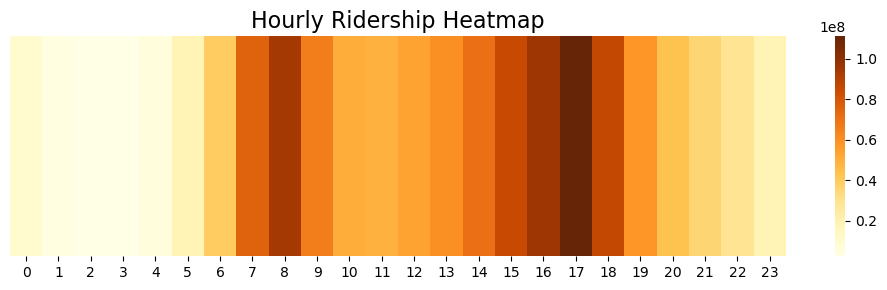

In [ ]:
# Hourly Ridership Heatmap
heatmap_data = hourly_ridership.set_index('hour')['ridership'].values.reshape(1, -1)

plt.figure(figsize=(10, 3))
sns.heatmap(heatmap_data, annot=False, fmt=",.0f", cmap="YlOrBr", cbar=True, yticklabels=[])

plt.title('Hourly Ridership Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Grouping by borough and selecting the top 3 stations by `ridership` in each borough
top_stations = (
    df_modified.groupby(['borough', 'station_complex'])
    .agg({'ridership': 'sum'})
    .reset_index()
    .sort_values(by=['borough', 'ridership'], ascending=[True, False])
    .groupby('borough')
    .head(3)
)

# Sonuç
top_stations

,borough,station_complex,ridership
2,Bronx,161 St-Yankee Stadium,5607108
16,Bronx,3 Av-149 St,3580903
33,Bronx,Fordham Rd,3546204
83,Brooklyn,Atlantic Av-Barclays Ctr,10074752
96,Brooklyn,Bedford Av,8497605
141,Brooklyn,Jay St-MetroTech,8205194
272,Manhattan,Times Sq-42 St,44353010
221,Manhattan,34 St-Penn Station,33885768
258,Manhattan,Grand Central-42 St,32762485
297,Queens,74-Broadway,14848763


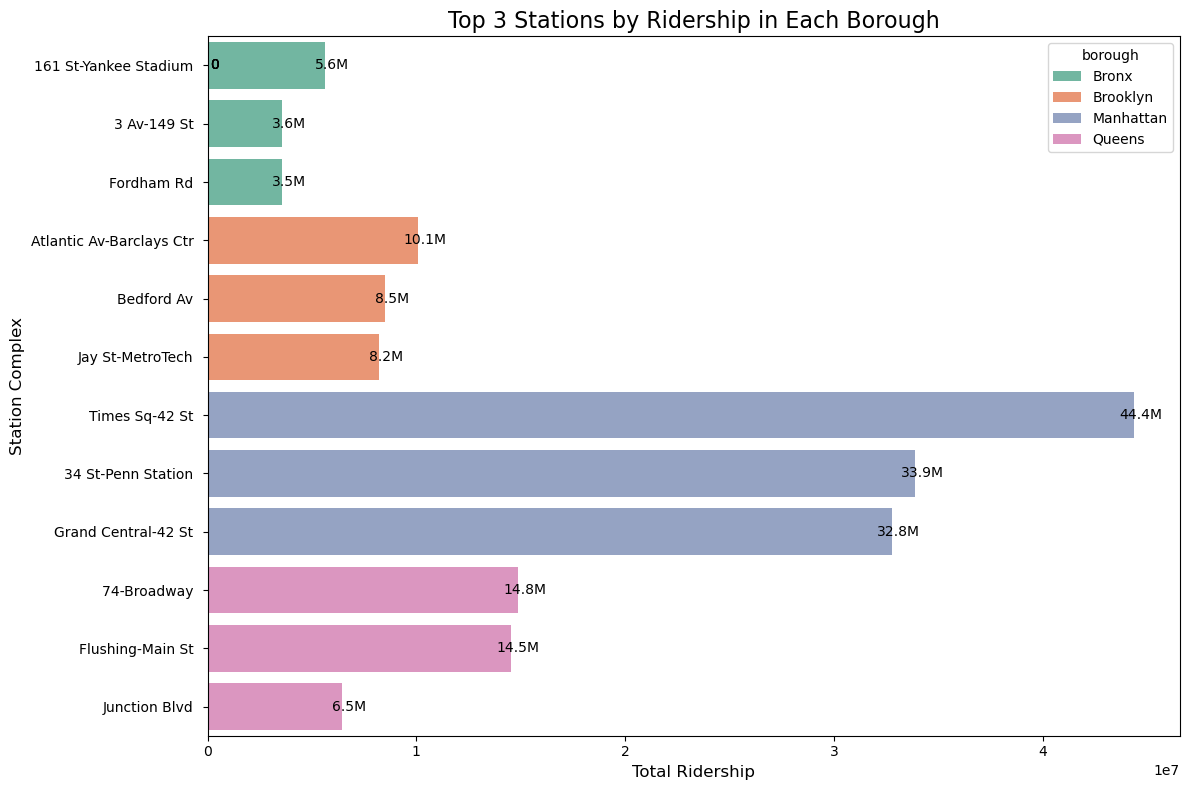

In [ ]:
# Bar plot Top 3 Stations by Ridership in Each Borough"
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='ridership', y='station_complex', hue='borough', data=top_stations, palette='Set2')

for p in ax.patches:
    ridership_value = p.get_width()
    ridership_display = f'{ridership_value / 1_000_000:.1f}M' if ridership_value >= 1_000_000 else f'{ridership_value:.0f}'
    
    ax.annotate(ridership_display, 
                (p.get_width() + 1000, p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points', 
                ha='center', va='center', fontsize=10, color='black')

plt.title('Top 3 Stations by Ridership in Each Borough', fontsize=16)
plt.xlabel('Total Ridership', fontsize=12)
plt.ylabel('Station Complex', fontsize=12)

plt.tight_layout()

plt.show()

In [ ]:
# Monthly Ridership Totals by Borough
monthly_ridership_by_borough = df_modified.groupby(['borough', 'month_name'])['ridership'].sum().unstack()
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_ridership_by_borough = monthly_ridership_by_borough[month_order]
monthly_ridership_by_borough

month_name,January,February,March,April,May,June,July,August,September,October,November,December
borough,,,,,,,,,,,,
Bronx,6285896,6173879,6919940,6822841,7254290,6435627,6141229,6079253,6752061,6611802,6835642,6475097
Brooklyn,21202016,20759765,22904972,22341000,24083611,21511288,20206369,20051968,21798771,21471943,22196976,21441323
Manhattan,51346099,50905773,56307126,56352579,59685093,54380706,53862671,52651154,51464603,54952677,55724795,55927126
Queens,13660896,13462192,14945883,14804215,15926458,14622259,14503641,14508902,14717496,14335371,14645824,14161441


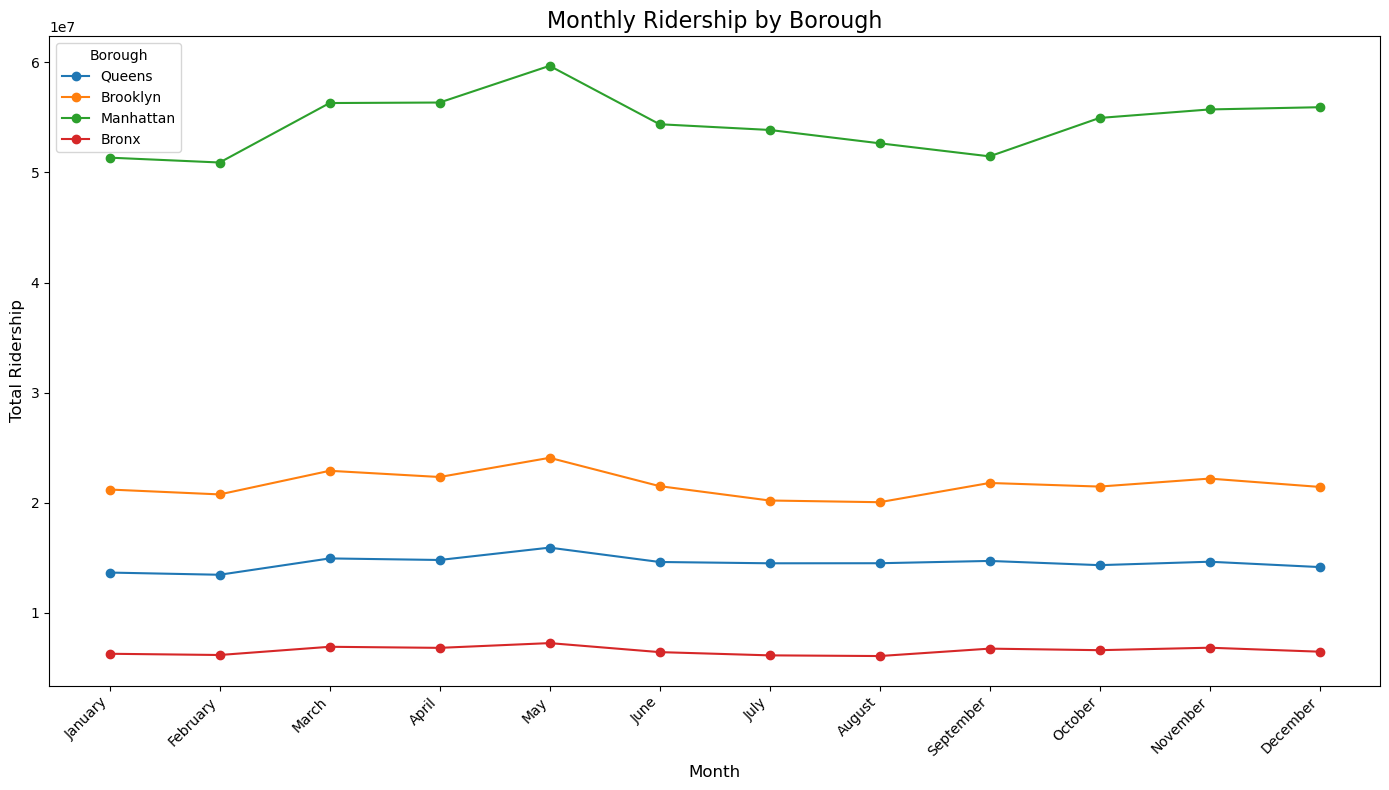

In [ ]:
# Line graph for Monthly Ridership Trends by Borough
plt.figure(figsize=(14, 8))

for borough in df_modified['borough'].unique():
    borough_data = monthly_ridership_by_borough.loc[borough]
    plt.plot(borough_data.index, borough_data.values, label=borough, marker='o')

plt.title('Monthly Ridership by Borough', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Ridership', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.tight_layout()
plt.show()


In [ ]:
# Get the day name (day) from the 'transit timestamp' column
df_modified.loc[:, 'day'] = pd.to_datetime(df_modified['transit_timestamp']).dt.day_name()
df_modified[['transit_timestamp', 'day']].head()

C:\Users\Sevag\AppData\Local\Temp\ipykernel_6536\624504630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified.loc[:, 'day'] = pd.to_datetime(df_modified['transit_timestamp']).dt.day_name()


,transit_timestamp,day
0,2023-11-01 00:00:00,Wednesday
1,2023-11-01 00:00:00,Wednesday
2,2023-11-01 00:00:00,Wednesday
3,2023-11-01 00:00:00,Wednesday
4,2023-11-01 00:00:00,Wednesday


In [ ]:
# Average Ridership by Station and Day in Manhattan"
manhattanStations = df_modified[df_modified['borough'] == 'Manhattan']
averageRidershipofeachday = manhattanStations.groupby(['station_complex', 'day'])['ridership'].mean().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
averageRidershipofeachday['day'] = pd.Categorical(averageRidershipofeachday['day'], categories=day_order, ordered=True)
averageRidershipofeachdaySorted = averageRidershipofeachday.sort_values(by=['ridership'], ascending=False)
averageRidershipofeachdaySorted.head(10)


,station_complex,day,ridership
566,Times Sq-42 St,Wednesday,656.424494
564,Times Sq-42 St,Thursday,640.476665
565,Times Sq-42 St,Tuesday,636.731974
560,Times Sq-42 St,Friday,576.064356
468,Grand Central-42 St,Wednesday,539.530867
467,Grand Central-42 St,Tuesday,537.179580
561,Times Sq-42 St,Monday,533.790301
466,Grand Central-42 St,Thursday,521.798215
562,Times Sq-42 St,Saturday,474.581108
463,Grand Central-42 St,Monday,435.647297


C:\Users\Sevag\AppData\Local\Temp\ipykernel_6536\1657412511.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_ridership_by_day_top_10 = top_10_averageRidershipofeachday.pivot_table(index='station_complex', columns='day', values='ridership')


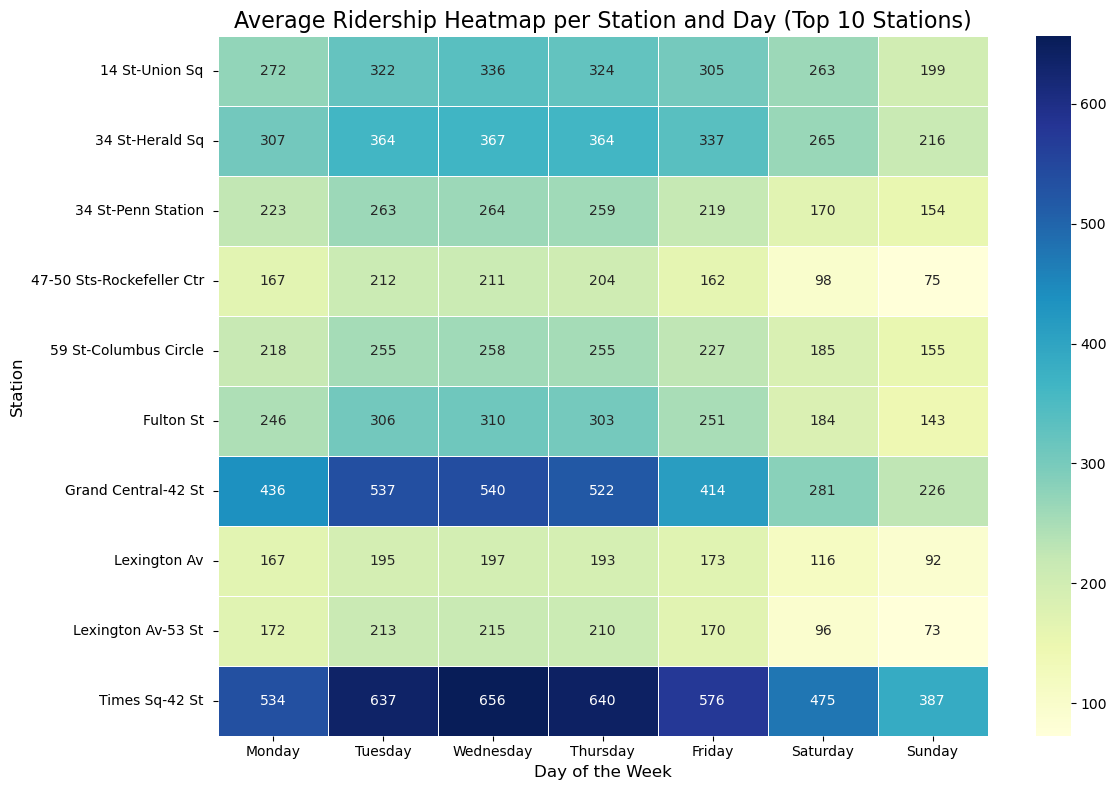

In [ ]:
# Average Ridership Heatmap per Station and Day (Top 10 Stations)
top_10_stations = averageRidershipofeachday.groupby('station_complex')['ridership'].mean().sort_values(ascending=False).head(10).index
top_10_averageRidershipofeachday = averageRidershipofeachday[averageRidershipofeachday['station_complex'].isin(top_10_stations)]

pivot_ridership_by_day_top_10 = top_10_averageRidershipofeachday.pivot_table(index='station_complex', columns='day', values='ridership')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_ridership_by_day_top_10, annot=True, cmap='YlGnBu', fmt='.0f', linewidths=0.5)

plt.title('Average Ridership Heatmap per Station and Day (Top 10 Stations)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Highest Ridership per Day for Each Station
top_ridership_per_station = averageRidershipofeachdaySorted.loc[averageRidershipofeachdaySorted.groupby('station_complex')['ridership'].idxmax()]

top_ridership_per_station[['station_complex', 'day', 'ridership']].sort_values(by=['ridership'], ascending=False).head(10)

,station_complex,day,ridership
566,Times Sq-42 St,Wednesday,656.424494
468,Grand Central-42 St,Wednesday,539.530867
195,34 St-Herald Sq,Wednesday,366.555865
69,14 St-Union Sq,Wednesday,336.051567
461,Fulton St,Wednesday,310.394455
209,34 St-Penn Station,Wednesday,263.500922
265,59 St-Columbus Circle,Wednesday,257.842839
510,Lexington Av-53 St,Wednesday,214.674388
215,47-50 Sts-Rockefeller Ctr,Tuesday,211.654098
503,Lexington Av,Wednesday,196.599307


In [ ]:
# Average Ridership by Hour for Stations in Manhattan
manhattanStations = df_modified[df_modified['borough'] == 'Manhattan']

ridershipByHour = manhattanStations.groupby(['station_complex', 'hour'])['ridership'].mean().reset_index()

ridershipByHourSorted = ridershipByHour.sort_values(by=['station_complex', 'ridership'], ascending=[True, False])

peakHours = ridershipByHourSorted.groupby('station_complex').first().reset_index()

ridershipByHourSorted


,station_complex,hour,ridership
17,1 Av,17:00,157.490898
18,1 Av,18:00,150.831222
8,1 Av,08:00,149.711755
16,1 Av,16:00,142.912809
15,1 Av,15:00,137.965201
...,...,...,...
1993,Wall St,01:00,4.844624
1997,Wall St,05:00,4.768660
1994,Wall St,02:00,3.004268
1996,Wall St,04:00,2.239711


In [ ]:
# Peak Hour and Ridership for Each Station
top_hour_per_station = ridershipByHour.loc[ridershipByHour.groupby('station_complex')['ridership'].idxmax()]

top_hour_per_station_sorted = top_hour_per_station.sort_values(by='ridership', ascending=False)

top_hour_per_station_sorted[['station_complex', 'hour', 'ridership']].head(10)


,station_complex,hour,ridership
1601,Grand Central-42 St,17:00,1276.012562
1937,Times Sq-42 St,17:00,1204.812770
665,34 St-Herald Sq,17:00,885.526895
1577,Fulton St,17:00,803.662434
233,14 St-Union Sq,17:00,714.748624
737,47-50 Sts-Rockefeller Ctr,17:00,710.784460
1313,Bryant Pk,17:00,592.674934
1745,Lexington Av-53 St,17:00,588.707946
905,59 St-Columbus Circle,17:00,587.922571
1721,Lexington Av,17:00,529.846293


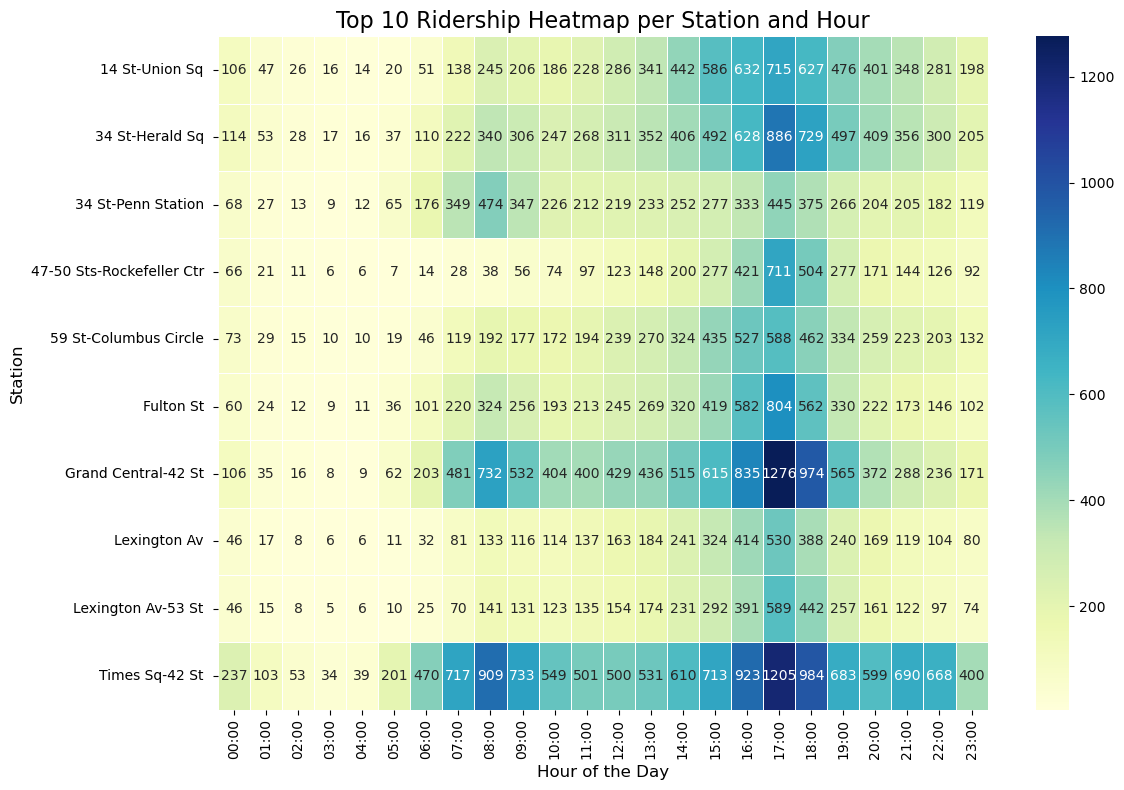

In [ ]:
# Top 10 Ridership Heatmap per Station and Hour
top_10_stations = ridershipByHour.groupby('station_complex')['ridership'].mean().sort_values(ascending=False).head(10).index

top_10_ridershipByHour = ridershipByHour[ridershipByHour['station_complex'].isin(top_10_stations)]

pivot_ridership_by_hour = top_10_ridershipByHour.pivot_table(index='station_complex', columns='hour', values='ridership')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_ridership_by_hour, annot=True, cmap='YlGnBu', fmt='.0f', linewidths=0.5)

plt.title('Top 10 Ridership Heatmap per Station and Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# Top 10 Peak Ridership Times by Station in Manhattan
manhattanStations = df_modified[df_modified['borough'] == 'Manhattan']
# Calculate passenger density by time and day combination
ridershipByDayAndHour = manhattanStations.groupby(['station_complex', 'day', 'hour'])['ridership'].mean().reset_index()
# Create a 'peak_time' column by combining day and time
ridershipByDayAndHour['peak_time'] = ridershipByDayAndHour['day'] + ' at ' + ridershipByDayAndHour['hour'].astype(str) + ':00'

ridershipByDayAndHourSorted = ridershipByDayAndHour.sort_values(by=['ridership'], ascending=False)
top_10_peak_times = ridershipByDayAndHourSorted.head(20)
top_10_peak_times[['station_complex', 'peak_time', 'ridership']]


,station_complex,peak_time,ridership
11249,Grand Central-42 St,Wednesday at 17:00:00,1869.275654
11225,Grand Central-42 St,Tuesday at 17:00:00,1862.989899
11201,Grand Central-42 St,Thursday at 17:00:00,1702.827038
13601,Times Sq-42 St,Wednesday at 17:00:00,1591.194059
13577,Times Sq-42 St,Tuesday at 17:00:00,1553.937374
13553,Times Sq-42 St,Thursday at 17:00:00,1440.916832
11129,Grand Central-42 St,Monday at 17:00:00,1399.520747
11226,Grand Central-42 St,Tuesday at 18:00:00,1369.642276
11250,Grand Central-42 St,Wednesday at 18:00:00,1351.152778
13592,Times Sq-42 St,Wednesday at 08:00:00,1305.685484
